In [25]:
%matplotlib notebook
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [66]:
with h5py.File("data/test.h5", "r") as f:
    p = dict(f.attrs)
    sol = {k: np.asarray(f[k]) for k in f}

In [67]:
p

{'A': 1.0,
 'D': 1.0,
 'Lx': 2.0,
 'Ly': 1.0,
 'T': 1.0,
 'X0': array([[0.  , 0.  ],
        [0.5 , 0.5 ],
        [0.75, 0.75]]),
 'k': 0.0,
 'm': 3,
 'nx': 32,
 'ny': 16,
 'r': 1.0,
 'saveat': 0.0005,
 'tmax': 1.0,
 'σ': 0.25}

In [68]:
sol['u'].shape

(2001, 16, 32)

<IPython.core.display.Javascript object>


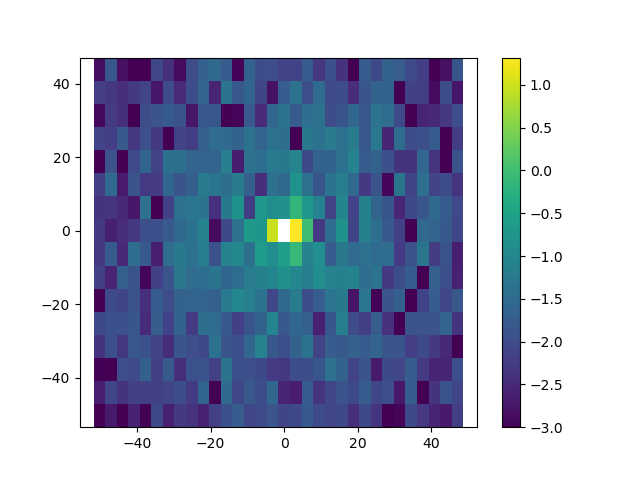

/tmp/ipykernel_282489/1863031657.py:2: RuntimeWarning: divide by zero encountered in log10
  pc = ax.pcolormesh(sol['kx'], sol['ky'], np.log10(np.abs(sol['uf'][-1])),


In [69]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(sol['kx'], sol['ky'], np.log10(np.abs(sol['uf'][-1])),
                 vmin=-3)
ax.axis("equal")
fig.colorbar(pc)

<IPython.core.display.Javascript object>


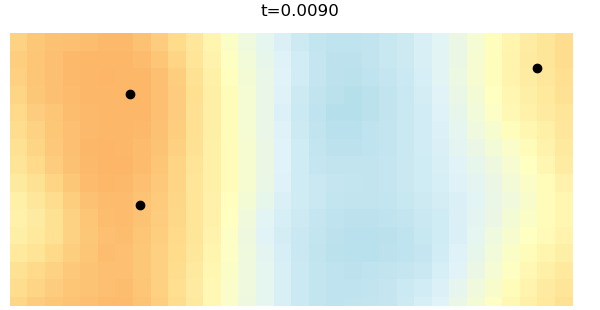

In [83]:
fig, ax = plt.subplots(figsize=(6, 3.1), constrained_layout=True)

vm = 0.8 * np.max(np.abs(sol["u"]))
#cols = ["0.6", "0.3", "0."]
cols = ["0.", "0.", "0."]

def update(n):
    ax.clear()
    ax.axis('off')
    ax.pcolormesh(sol['x'], sol['y'], sol['u'][n],
                 cmap="RdYlBu_r", vmin=-vm, vmax=vm)
    for i in range(p["m"]):
        ax.plot(sol['X'][n, i, 0]%p["Lx"], sol['X'][n, i, 1]%p["Ly"],
                "o", color=cols[i])
    ax.axis('equal')
    ax.set_xlim(0., p["Lx"])
    ax.set_ylim(0., p["Ly"])
    ax.set_title(f"t={n*p['saveat']:.4f}")
    
#update(-1)
ani = FuncAnimation(fig, update, interval=100, frames=500)
                    #frames=sol["u"].shape[0])
pc = lambda i, n: print(i, "/", n, end='\r')
ani.save(f"videos/gaussian_field_test.mp4", progress_callback=pc)